1. In this laboratory work you need to download
Meteorological data in 1895-2022 from the CSV file in DataFrame.After
This data will need to be formatted for use.

2. SEADORN Library Use for graphic
Dataframe data in the form of a regression line that
represents the schedule of change of selected indicators for the period 1895-2018
years.

3. Predict the data for 2019, 2020, 2021 and 2022.
Indication: Linear_regression.slope corresponds to m, 2019 corresponds to X
(the value for which the temperature is predicted) and
Linear_regression.interception corresponds to b:
 
4. Evaluate the formula that could be the indicators before 1895
the year.For example, an average temperature estimate for January 1890
May be obtained as follows:
 
5. Use the Seaborn Regplot Library for
output all data points;

6. Perform an axis in from (an example from 10 to 70
degrees):

7. Compare the obtained forecast for 2019, 2020, 2021 and for
2022 with data on NOAA "Climate at A Glance":
https://www.ncdc.noaa.gov/cag/ and conclude.

In [1]:
import pandas as pd
import os
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

First we load the required data into the dataframe

In [2]:
df=pd.read_csv(os.path.abspath(os.path.join(os.getcwd(), '1895-2023.csv')), skiprows=4)
df.head()

,Date,Value,Anomaly
0,189501,28.9,-3.1
1,189601,28.5,-3.5
2,189701,29.3,-2.7
3,189801,33.9,1.9
4,189901,29.8,-2.2


Cleaning the data:

In [3]:
df.Date=df.Date//100
df.head()

,Date,Value,Anomaly
0,1895,28.9,-3.1
1,1896,28.5,-3.5
2,1897,29.3,-2.7
3,1898,33.9,1.9
4,1899,29.8,-2.2


First we graph only the regression line, that we have got from building the regression model. To draw a line we can join two points, y coordinates for which we can get from the regression equation.

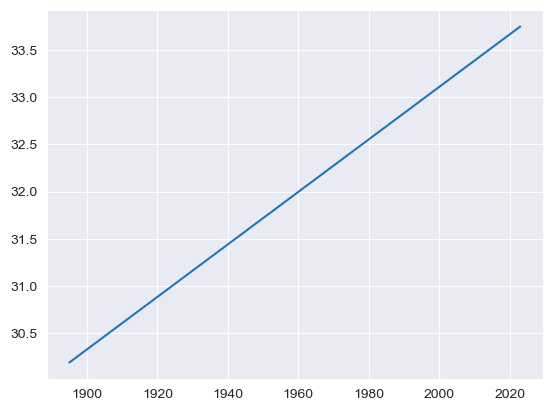

In [4]:
linear_regression=stats.linregress(x=df.Date,y=df.Value)

def get_y(x):
    return linear_regression.slope*x+linear_regression.intercept

x1,x2= 1895, 2023
y1, y2 = get_y(x1), get_y(x2)

plt.plot([x1, x2], [y1, y2])
plt.show()

To predict data for upcoming years we once again use the equation for regression line

In [5]:
df['prediction']=linear_regression.slope*df.Date+linear_regression.intercept
print(df.query('Date>=2019'))

     Date  Value  Anomaly  prediction
124  2019   32.6      0.6   33.639017
125  2020   39.2      7.2   33.666851
126  2021   34.8      2.8   33.694684
127  2022   30.4     -1.6   33.722518
128  2023   43.5     11.5   33.750352


Let's make an estimate for temperature in 1890

In [6]:
pred_for_1890=get_y(1890)
print(pred_for_1890)

30.048463960942165


Now let's use the Seaborn Regplot Library for output all data points; In addition we limit our view on the y axis by given constraints of 10 and 70

(10.0, 70.0)

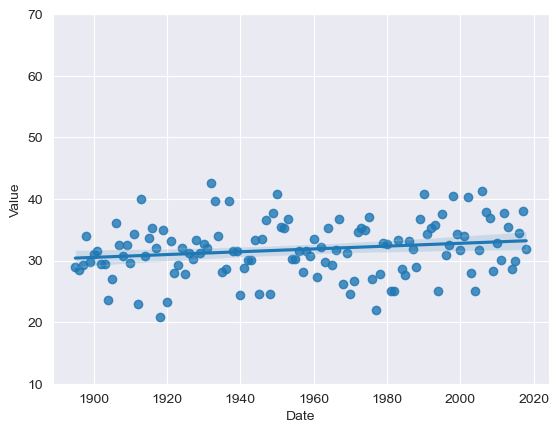

In [7]:
# Filter the data for the desired period
df_filtered = df[df['Date'].between(1895, 2018)]

# Create a regression plot
regression_plot = sns.regplot(x='Date', y='Value', data=df_filtered)
#task for scaling y axis is under this comment, can be commented to obtain raw results.
regression_plot.set_ylim(10,70)